In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential


In [ ]:
batch_size = 128
img_height = 129
img_width = 515

train_ds = tf.keras.utils.image_dataset_from_directory(
	"birds",
	validation_split=0.2,
	subset="training",
	seed=123,
	image_size=(img_height, img_width),
	batch_size=batch_size,
	color_mode="grayscale")

val_ds = tf.keras.utils.image_dataset_from_directory(
	"birds",
	validation_split=0.2,
	subset="validation",
	seed=123,
	image_size=(img_height, img_width),
	batch_size=batch_size,
	color_mode="grayscale")


print(train_ds.class_names)
class_names = train_ds.class_names

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"), cmap="gray")
    plt.title(train_ds.class_names[labels[i]])
    plt.axis("off")


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_2 (Rescaling)         │ (None, 129, 515, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 129, 515, 16)   │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 64, 257, 16)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 64, 257, 32)    │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 32, 128, 32)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 131072)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │     8,388,672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,393,797 (32.02 MB)

 Trainable params: 8,393,797 (32.02 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 84s 2s/step - accuracy: 0.2060 - loss: 5.7805 - val_accuracy: 0.2334 - val_loss: 1.6018
Epoch 2/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 98s 3s/step - accuracy: 0.2400 - loss: 1.6019 - val_accuracy: 0.2334 - val_loss: 1.6000
Epoch 3/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 104s 3s/step - accuracy: 0.2404 - loss: 1.6024 - val_accuracy: 0.2334 - val_loss: 1.5996
Epoch 4/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 100s 3s/step - accuracy: 0.2412 - loss: 1.6000 - val_accuracy: 0.2463 - val_loss: 1.5703
Epoch 5/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 99s 3s/step - accuracy: 0.3109 - loss: 1.4988 - val_accuracy: 0.4474 - val_loss: 1.2594
Epoch 6/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 141s 3s/step - accuracy: 0.4843 - loss: 1.1988 - val_accuracy: 0.5858 - val_loss: 1.0575
Epoch 7/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 100s 3s/step - accuracy: 0.6043 - loss: 1.0133 - val_accuracy: 0.5969 - val_loss: 0.9782
Epoch 8/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 100s 3s/step - accuracy: 0.6636 - loss: 0.8765 - val_accuracy: 0.6264 - val_

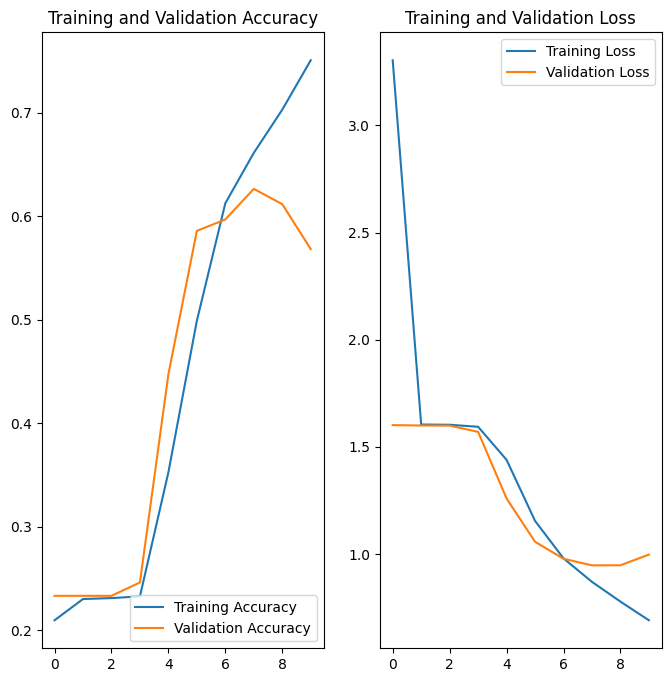

In [11]:
num_classes = len(class_names)

# 74 % val acc
model = Sequential([
	layers.Rescaling(1./255, input_shape=(img_height, img_width, 1)),
	layers.Conv2D(16, 3, padding='same', activation='relu'),
	layers.MaxPooling2D(),
	layers.Conv2D(32, 3, padding='same', activation='relu'),
	layers.MaxPooling2D(),
	layers.Conv2D(64, 3, padding='same', activation='relu'),
	layers.MaxPooling2D(),
	layers.Flatten(),
	layers.Dense(128, activation='relu'),
	layers.Dense(num_classes)
])

model.compile(
	optimizer='adam',
	loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
	metrics=['accuracy']
)

model.summary()

epochs=10
history = model.fit(
	train_ds,
	validation_data=val_ds,
	epochs=epochs
)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [ ]:
model.save("birds_74.h5")